In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# File paths and names
xlsx_path = "D:\\Armaghan_PhD_Dissertation\\database\\Revised data"
xlsx_file = "new data-3 - revised with new data.xlsx"

# Get user inputs for sheet names
material1_sheet = input("Enter the first material sheet name (e.g., 'Ti'): ")
material2_sheet = input("Enter the second material sheet name (e.g., 'Cu'): ")

# Load material data
data = {}
for material_sheet in [material1_sheet, material2_sheet]:
    file_path = os.path.join(xlsx_path, xlsx_file)
    material_data = pd.read_excel(file_path, sheet_name=material_sheet)
    data[material_sheet] = material_data

# Take 50% of each material for each variable
combined_data = (data[material1_sheet].iloc[:, 1:] + data[material2_sheet].iloc[:, 1:]) / 2.0

# Extract temperature-related information
temperature_col = "T (K)"
temperature_data = data[material1_sheet][temperature_col]

# Combine material data
merged_data = pd.concat([temperature_data, combined_data], axis=1)

# Get user input for temperature
temperature_input = float(input("Enter the temperature (in K): "))
closest_index = np.argmin(np.abs(temperature_data - temperature_input))
properties_at_temperature = merged_data.iloc[closest_index]

# Prepare data for training the decision tree model
X = combined_data.values
y = merged_data.iloc[:, 1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# Predict properties at the specified temperature
temperature_input_scaled = scaler_X.transform([properties_at_temperature.iloc[1:].values])
predicted_properties_scaled = model.predict(temperature_input_scaled.reshape(1, -1))
predicted_properties = scaler_y.inverse_transform(predicted_properties_scaled)

# Calculate R2 score manually
y_test_pred = model.predict(X_test_scaled)
rss = np.sum((y_test_scaled - y_test_pred) ** 2)  # Residual sum of squares
tss = np.sum((y_test_scaled - np.mean(y_test_scaled)) ** 2)  # Total sum of squares
r2_manual = 1 - (rss / tss)

# Display predicted material properties for the combined material at the specified temperature
print("\nPredicted Material Properties for Combined Material at {}K:".format(int(temperature_input)))
for property_name, predicted_value in zip(data[material1_sheet].columns[1:], predicted_properties.flatten()):
    print("{} at {}K - Predicted: {:.6f}".format(property_name, temperature_input, predicted_value))

# Display Manually Calculated R2 Score
print("\nManually Calculated R2 Score: {:.6f}".format(r2_manual))


Enter the first material sheet name (e.g., 'Ti'): 
Enter the second material sheet name (e.g., 'Cu'): 


ValueError: Worksheet named '' not found

Enter the first material sheet name (e.g., 'Ti'): Ti
Enter the second material sheet name (e.g., 'Cu'): Cu


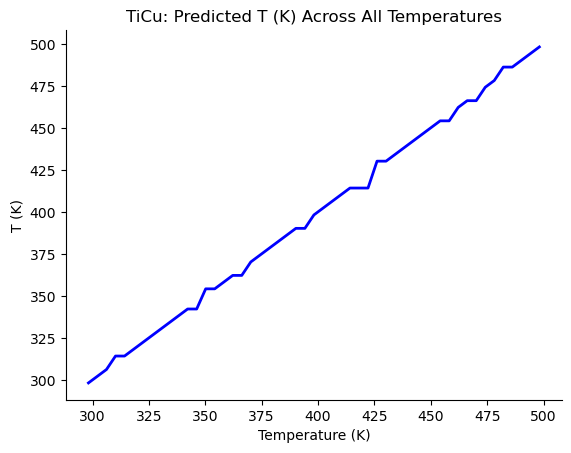

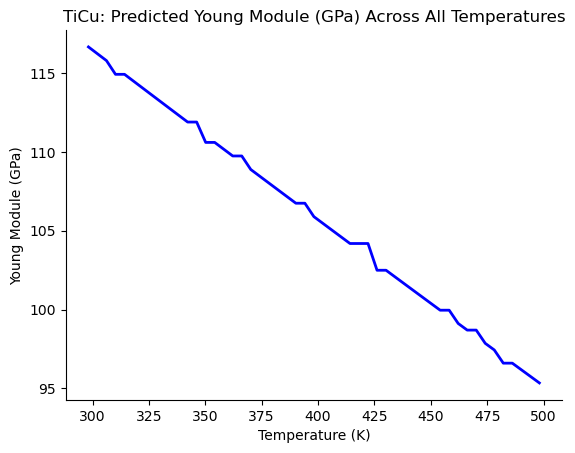

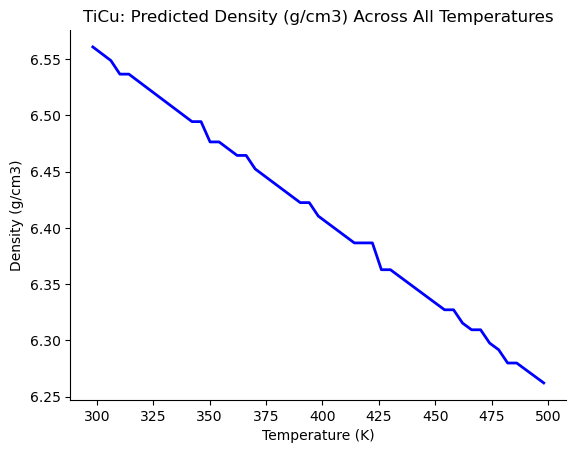

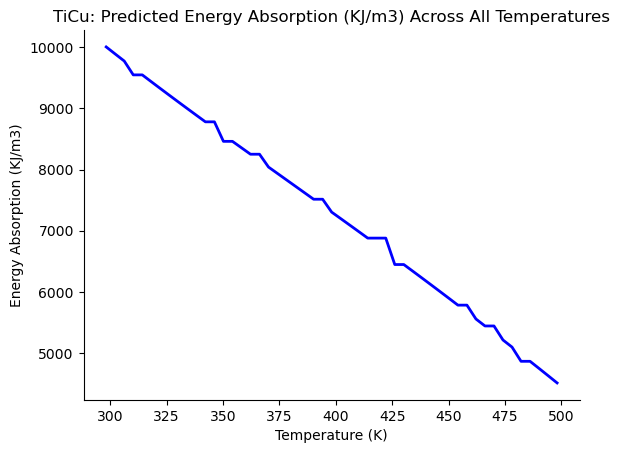

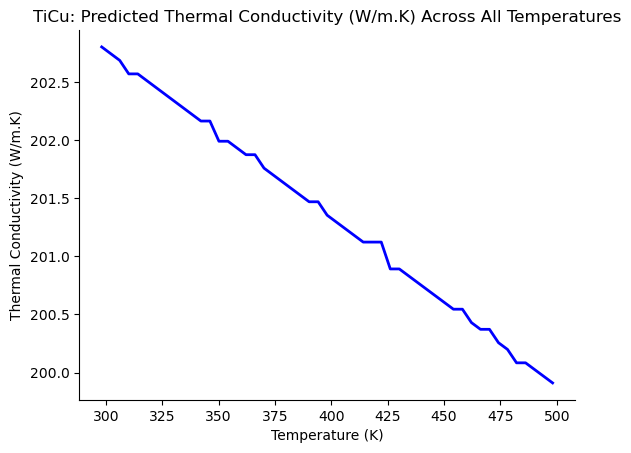

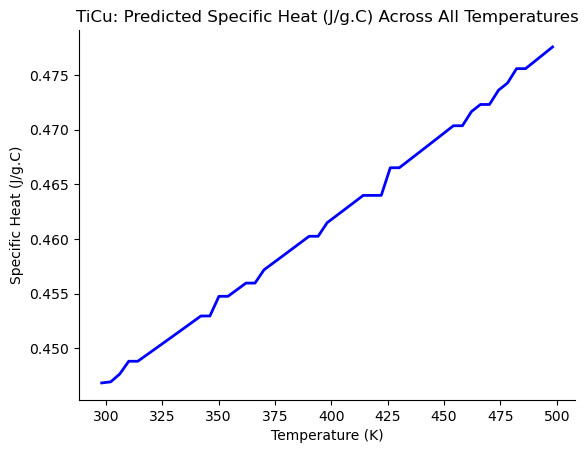

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# File paths and names
xlsx_path = "D:\\Armaghan_PhD_Dissertation\\database\\Revised data"
xlsx_file = "new data-3 - revised with new data.xlsx"

# Get user inputs for sheet names
material1_sheet = input("Enter the first material sheet name (e.g., 'Ti'): ")
material2_sheet = input("Enter the second material sheet name (e.g., 'Cu'): ")

# Load material data
data = {}
for material_sheet in [material1_sheet, material2_sheet]:
    file_path = os.path.join(xlsx_path, xlsx_file)
    material_data = pd.read_excel(file_path, sheet_name=material_sheet)
    data[material_sheet] = material_data

# Take 50% of each material for each variable
combined_data = (data[material1_sheet].iloc[:, 1:] + data[material2_sheet].iloc[:, 1:]) / 2.0

# Extract temperature-related information
temperature_col = "T (K)"
temperature_data = data[material1_sheet][temperature_col]

# Combine material data
merged_data = pd.concat([temperature_data, combined_data], axis=1)

# Prepare data for training the decision tree model
X = combined_data.values
y = merged_data.iloc[:, 1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# Predict properties across all temperatures
predicted_properties_scaled = model.predict(scaler_X.transform(X))
predicted_properties = scaler_y.inverse_transform(predicted_properties_scaled)

# Generate linear plots for each property except band gap
for i, property_name in enumerate(data[material1_sheet].columns[1:]):
    if 'band gap' not in property_name.lower():
        plt.figure(facecolor='white')
        ax = plt.gca()
        ax.set_facecolor('white')
        ax.xaxis.label.set_color('black')
        ax.yaxis.label.set_color('black')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_color('black')
        ax.tick_params(axis='x', colors='black')
        ax.tick_params(axis='y', colors='black')
        
        plt.plot(temperature_data, predicted_properties[:, i], color='blue', lw=2)
        plt.xlabel('Temperature (K)', color='black')
        plt.ylabel(property_name, color='black')
        plt.title(f'TiCu: Predicted {property_name} Across All Temperatures', color='black')
        plt.show()


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# File paths and names
xlsx_path = "D:\\Armaghan_PhD_Dissertation\\database\\Revised data"
xlsx_file = "new data-3 - revised with new data.xlsx"
output_file = "D:\\Armaghan_PhD_Dissertation\\database\\Revised data\\Outputs\\Dashboard.png"
predicted_output_file = "D:\\Armaghan_PhD_Dissertation\\database\\Revised data\\Outputs\\Predicted_Properties.xlsx"

# Get user inputs for sheet names
material1_sheet = input("Enter the first material sheet name (e.g., 'Ti'): ")
material2_sheet = input("Enter the second material sheet name (e.g., 'Al'): ")

# Load material data
data = {}
for material_sheet in [material1_sheet, material2_sheet]:
    file_path = os.path.join(xlsx_path, xlsx_file)
    material_data = pd.read_excel(file_path, sheet_name=material_sheet)
    data[material_sheet] = material_data

# Take 50% of each material for each variable
combined_data = (data[material1_sheet].iloc[:, 1:] + data[material2_sheet].iloc[:, 1:]) / 2.0

# Extract temperature-related information
temperature_col = "T (K)"
temperature_data = data[material1_sheet][temperature_col]

# Combine material data
merged_data = pd.concat([temperature_data, combined_data], axis=1)

# Prepare data for training the ANN model
X = combined_data.values
y = merged_data.iloc[:, 1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Train the ANN model
model = MLPRegressor(hidden_layer_sizes=(200, 75), max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# Predict properties across all temperatures
predicted_properties_scaled = model.predict(scaler_X.transform(X))
predicted_properties = scaler_y.inverse_transform(predicted_properties_scaled)

# Calculate R² score for the training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, scaler_y.inverse_transform(y_train_pred))
r2_test = r2_score(y_test, scaler_y.inverse_transform(y_test_pred))

print(f"R² score for the training set: {r2_train:.4f}")
print(f"R² score for the test set: {r2_test:.4f}")

# Prepare to save predicted properties to an Excel file
predicted_df = pd.DataFrame(predicted_properties, columns=[col for col in data[material1_sheet].columns[1:]])

# Ensure the temperature column is not already present before inserting it
if temperature_col in predicted_df.columns:
    predicted_df = predicted_df.drop(columns=[temperature_col])

# Insert the temperature column at the start
predicted_df.insert(0, temperature_col, temperature_data.values)

# Save the DataFrame to an Excel file
predicted_df.to_excel(predicted_output_file, index=False)

# Prepare to create a vertical dashboard with subplots
property_names = [col for col in data[material1_sheet].columns[1:] if 'band gap' not in col.lower()]

# Ensure there are properties to plot
if not property_names:
    raise ValueError("No properties to plot after excluding 'band gap'.")

# Skip the first property (Plot A) if needed
property_names = property_names[1:]

num_properties = len(property_names)
num_cols = 1  # Number of columns in the subplot grid
num_rows = num_properties  # Number of rows needed

# Increase figure size
plt.figure(figsize=(10, 5 * num_rows), facecolor='white')

# Font size settings
font_size_title = 18
font_size_labels = 16
font_size_ticks = 14

# Generate subplots for each property, excluding the first property
for i, property_name in enumerate(property_names):
    plt.subplot(num_rows, num_cols, i + 1)
    property_index = data[material1_sheet].columns[1:].tolist().index(property_name)  # Find the index of the property in the data

    # Handle index errors if property_index is out of range
    if property_index >= len(predicted_properties[0]):
        print(f"Warning: Property index {property_index} is out of range for predicted properties.")
        continue

    plt.plot(temperature_data, predicted_properties[:, property_index], color='blue', lw=2)
    plt.xlabel('Temperature (K)', color='black', fontsize=font_size_labels)
    plt.ylabel(property_name, color='black', fontsize=font_size_labels)
    plt.title(f'{chr(65 + i)}: {property_name}', color='black', fontsize=font_size_title)  # Label plots as A, B, C, etc.
    plt.gca().set_facecolor('white')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().tick_params(axis='x', colors='black', labelsize=font_size_ticks)
    plt.gca().tick_params(axis='y', colors='black', labelsize=font_size_ticks)

# Adjust layout and save the dashboard
plt.tight_layout()
plt.savefig(output_file)
plt.close()

print(f"Vertical dashboard saved successfully as {output_file}.")
print(f"Predicted properties saved successfully as {predicted_output_file}.")


Enter the first material sheet name (e.g., 'Ti'): Ti
Enter the second material sheet name (e.g., 'Al'): Cu
R² score for the training set: 0.8558
R² score for the test set: 0.8551
Vertical dashboard saved successfully as D:\Armaghan_PhD_Dissertation\database\Revised data\Outputs\Dashboard.png.
Predicted properties saved successfully as D:\Armaghan_PhD_Dissertation\database\Revised data\Outputs\Predicted_Properties.xlsx.
